In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, SeparableConv1D, BatchNormalization, InputLayer, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model,to_categorical
import pandas as pd
import seaborn as sns
import time

In [2]:
label_train = np.load("data_coding3/new/weight/label_train.npy")
img_train = np.load("data_coding3/new/weight/img_train.npy")
label_val = np.load("data_coding3/new/weight/label_val.npy")
img_val = np.load("data_coding3/new/weight/img_val.npy")

In [3]:
print(img_train.shape, img_val.shape)
print(label_train.shape, label_val.shape)

(5486, 20) (1374, 20)
(5486,) (1374,)


In [4]:
label_train = to_categorical(label_train)
label_val = to_categorical(label_val)  

label_train = np.reshape(label_train, (label_train.shape[0], 6))
img_train = np.reshape(img_train, (img_train.shape[0], img_train.shape[1], 1))
label_val = np.reshape(label_val, (label_val.shape[0], 6))
img_val = np.reshape(img_val, (img_val.shape[0], img_val.shape[1],  1))

In [5]:
print(img_train.shape, img_val.shape)
print(label_train.shape, label_val.shape)

(5486, 20, 1) (1374, 20, 1)
(5486, 6) (1374, 6)


In [7]:
model = Sequential()
model.add(InputLayer(input_shape=(20,1)))

model.add(Conv1D(8, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(2)) 

model.add(Conv1D(16, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(2)) 

model.add(Conv1D(32, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(500))
model.add(Activation('relu'))

model.add(Dense(450))
model.add(Activation('relu'))

model.add(Dense(6))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'mae'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 18, 8)             32        
_________________________________________________________________
batch_normalization_3 (Batch (None, 18, 8)             32        
_________________________________________________________________
activation_6 (Activation)    (None, 18, 8)             0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 9, 8)              0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 7, 16)             400       
_________________________________________________________________
batch_normalization_4 (Batch (None, 7, 16)             64        
_________________________________________________________________
activation_7 (Activation)    (None, 7, 16)            

In [8]:
checkpoint = ModelCheckpoint("one-dimension.h5", monitor='val_accuracy', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='auto')

In [9]:
start = time.time()
history = model.fit(img_train,label_train, epochs=200, steps_per_epoch = 5, validation_data=(img_val, label_val),callbacks=[checkpoint])
stop = time.time()
print(f"Training time: {stop - start}s")

Epoch 1/200
5/5 [==============================] - 4s 96ms/step - loss: 1.0964 - accuracy: 0.7094 - mae: 0.1852 - val_loss: 1.3394 - val_accuracy: 0.8370 - val_mae: 0.0550

Epoch 00001: val_accuracy improved from -inf to 0.83697, saving model to one-dimension.h5
Epoch 2/200
5/5 [==============================] - 0s 30ms/step - loss: 0.7573 - accuracy: 0.8378 - mae: 0.0757 - val_loss: 1.0594 - val_accuracy: 0.8370 - val_mae: 0.0568

Epoch 00002: val_accuracy did not improve from 0.83697
Epoch 3/200
5/5 [==============================] - 0s 33ms/step - loss: 0.6740 - accuracy: 0.8378 - mae: 0.0798 - val_loss: 0.7195 - val_accuracy: 0.8370 - val_mae: 0.0809

Epoch 00003: val_accuracy did not improve from 0.83697
Epoch 4/200
5/5 [==============================] - 0s 34ms/step - loss: 0.6366 - accuracy: 0.8378 - mae: 0.0992 - val_loss: 0.7136 - val_accuracy: 0.8370 - val_mae: 0.1141

Epoch 00004: val_accuracy did not improve from 0.83697
Epoch 5/200
5/5 [==============================] - 0s

5/5 [==============================] - 0s 35ms/step - loss: 0.2500 - accuracy: 0.9110 - mae: 0.0443 - val_loss: 0.5826 - val_accuracy: 0.8333 - val_mae: 0.0746

Epoch 00036: val_accuracy did not improve from 0.83843
Epoch 37/200
5/5 [==============================] - 0s 32ms/step - loss: 0.2402 - accuracy: 0.9123 - mae: 0.0456 - val_loss: 0.6251 - val_accuracy: 0.8384 - val_mae: 0.0646

Epoch 00037: val_accuracy did not improve from 0.83843
Epoch 38/200
5/5 [==============================] - 0s 32ms/step - loss: 0.2319 - accuracy: 0.9229 - mae: 0.0441 - val_loss: 0.6043 - val_accuracy: 0.8377 - val_mae: 0.0670

Epoch 00038: val_accuracy did not improve from 0.83843
Epoch 39/200
5/5 [==============================] - 0s 30ms/step - loss: 0.2266 - accuracy: 0.9207 - mae: 0.0420 - val_loss: 0.5815 - val_accuracy: 0.8377 - val_mae: 0.0673

Epoch 00039: val_accuracy did not improve from 0.83843
Epoch 40/200
5/5 [==============================] - 0s 31ms/step - loss: 0.2206 - accuracy: 0.922


Epoch 00069: val_accuracy improved from 0.87627 to 0.88137, saving model to one-dimension.h5
Epoch 70/200
5/5 [==============================] - 0s 30ms/step - loss: 0.1069 - accuracy: 0.9672 - mae: 0.0226 - val_loss: 0.4176 - val_accuracy: 0.8763 - val_mae: 0.0544

Epoch 00070: val_accuracy did not improve from 0.88137
Epoch 71/200
5/5 [==============================] - 0s 29ms/step - loss: 0.1025 - accuracy: 0.9694 - mae: 0.0213 - val_loss: 0.3924 - val_accuracy: 0.8814 - val_mae: 0.0528

Epoch 00071: val_accuracy did not improve from 0.88137
Epoch 72/200
5/5 [==============================] - 0s 29ms/step - loss: 0.1007 - accuracy: 0.9708 - mae: 0.0217 - val_loss: 0.4345 - val_accuracy: 0.8828 - val_mae: 0.0488

Epoch 00072: val_accuracy improved from 0.88137 to 0.88282, saving model to one-dimension.h5
Epoch 73/200
5/5 [==============================] - 0s 30ms/step - loss: 0.1041 - accuracy: 0.9661 - mae: 0.0219 - val_loss: 0.3912 - val_accuracy: 0.8799 - val_mae: 0.0508

Epoch 0

5/5 [==============================] - 0s 34ms/step - loss: 0.0619 - accuracy: 0.9798 - mae: 0.0132 - val_loss: 0.2749 - val_accuracy: 0.9207 - val_mae: 0.0320

Epoch 00103: val_accuracy improved from 0.91921 to 0.92067, saving model to one-dimension.h5
Epoch 104/200
5/5 [==============================] - 0s 30ms/step - loss: 0.0573 - accuracy: 0.9838 - mae: 0.0130 - val_loss: 0.2788 - val_accuracy: 0.9258 - val_mae: 0.0300

Epoch 00104: val_accuracy improved from 0.92067 to 0.92576, saving model to one-dimension.h5
Epoch 105/200
5/5 [==============================] - 0s 31ms/step - loss: 0.0594 - accuracy: 0.9818 - mae: 0.0127 - val_loss: 0.2685 - val_accuracy: 0.9229 - val_mae: 0.0318

Epoch 00105: val_accuracy did not improve from 0.92576
Epoch 106/200
5/5 [==============================] - 0s 34ms/step - loss: 0.0537 - accuracy: 0.9849 - mae: 0.0118 - val_loss: 0.2655 - val_accuracy: 0.9170 - val_mae: 0.0317

Epoch 00106: val_accuracy did not improve from 0.92576
Epoch 107/200
5/5 


Epoch 00137: val_accuracy improved from 0.93523 to 0.93595, saving model to one-dimension.h5
Epoch 138/200
5/5 [==============================] - 0s 32ms/step - loss: 0.0294 - accuracy: 0.9934 - mae: 0.0072 - val_loss: 0.2845 - val_accuracy: 0.9345 - val_mae: 0.0246

Epoch 00138: val_accuracy did not improve from 0.93595
Epoch 139/200
5/5 [==============================] - 0s 33ms/step - loss: 0.0308 - accuracy: 0.9929 - mae: 0.0074 - val_loss: 0.2636 - val_accuracy: 0.9330 - val_mae: 0.0254

Epoch 00139: val_accuracy did not improve from 0.93595
Epoch 140/200
5/5 [==============================] - 0s 32ms/step - loss: 0.0331 - accuracy: 0.9900 - mae: 0.0078 - val_loss: 0.2995 - val_accuracy: 0.9330 - val_mae: 0.0248

Epoch 00140: val_accuracy did not improve from 0.93595
Epoch 141/200
5/5 [==============================] - 0s 33ms/step - loss: 0.0308 - accuracy: 0.9916 - mae: 0.0076 - val_loss: 0.2867 - val_accuracy: 0.9338 - val_mae: 0.0251

Epoch 00141: val_accuracy did not improve

5/5 [==============================] - 0s 31ms/step - loss: 0.0150 - accuracy: 0.9973 - mae: 0.0040 - val_loss: 0.4108 - val_accuracy: 0.9185 - val_mae: 0.0287

Epoch 00173: val_accuracy did not improve from 0.93814
Epoch 174/200
5/5 [==============================] - 0s 31ms/step - loss: 0.0151 - accuracy: 0.9971 - mae: 0.0040 - val_loss: 0.4058 - val_accuracy: 0.9236 - val_mae: 0.0281

Epoch 00174: val_accuracy did not improve from 0.93814
Epoch 175/200
5/5 [==============================] - 0s 33ms/step - loss: 0.0150 - accuracy: 0.9964 - mae: 0.0039 - val_loss: 0.4007 - val_accuracy: 0.9265 - val_mae: 0.0275

Epoch 00175: val_accuracy did not improve from 0.93814
Epoch 176/200
5/5 [==============================] - 0s 32ms/step - loss: 0.0174 - accuracy: 0.9962 - mae: 0.0042 - val_loss: 0.3824 - val_accuracy: 0.9294 - val_mae: 0.0260

Epoch 00176: val_accuracy did not improve from 0.93814
Epoch 177/200
5/5 [==============================] - 0s 32ms/step - loss: 0.0156 - accuracy: 0

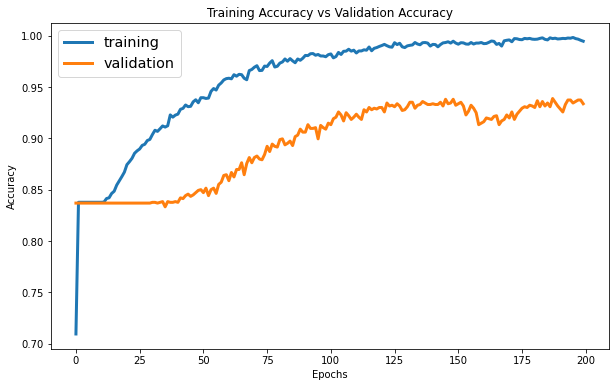

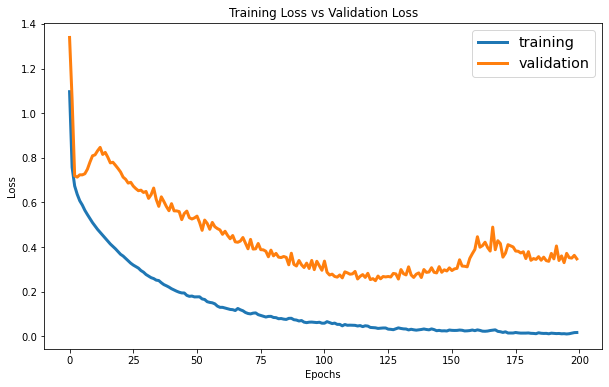

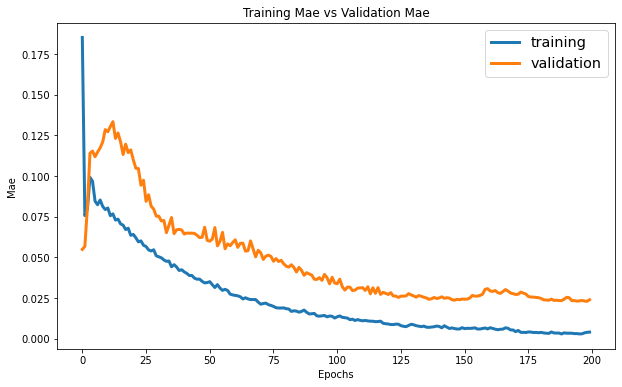

In [10]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label = 'training', linewidth = 3)
plt.plot(history.history['val_accuracy'], label = 'validation', linewidth = 3)
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(fontsize = 'x-large')
plt.show()
#plt.savefig("Pic/Training Accuracy vs Validation Accuracy_Batuk.jpg")

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label = 'training', linewidth = 3)
plt.plot(history.history['val_loss'], label = 'validation', linewidth = 3)
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(fontsize = 'x-large')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(history.history['mae'], label = 'training', linewidth = 3)
plt.plot(history.history['val_mae'], label = 'validation', linewidth = 3)
plt.title('Training Mae vs Validation Mae')
plt.xlabel('Epochs')
plt.ylabel('Mae')
plt.legend(fontsize = 'x-large')
plt.show()
#plt.savefig("Pic/Training Loss vs Validation Loss_Batuk.jpg")

                precision    recall  f1-score   support

Bronchiectasis       0.85      0.81      0.83        21
 Bronchiolitis       0.74      0.72      0.73        32
          COPD       0.97      0.97      0.97      1150
       Healthy       0.81      0.72      0.76        65
     Pneumonia       0.79      0.67      0.72        57
          URTI       0.60      0.78      0.68        49

      accuracy                           0.93      1374
     macro avg       0.79      0.78      0.78      1374
  weighted avg       0.94      0.93      0.93      1374



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

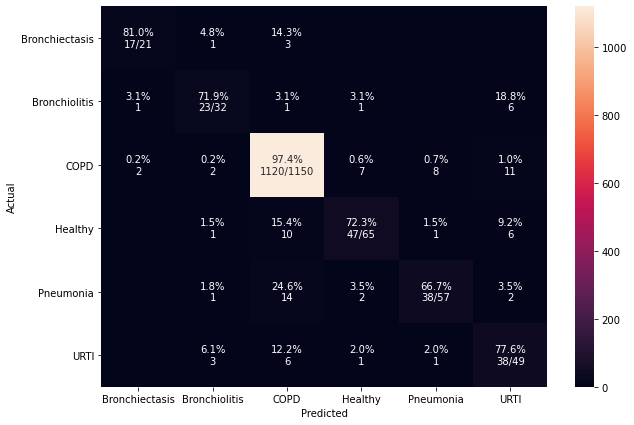

In [11]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
matrix_index = ['Bronchiectasis', 'Bronchiolitis', 'COPD', 'Healthy', 'Pneumonia', 'URTI']

preds = model.predict(img_val)
classpreds = np.argmax(preds, axis=1) # predicted classes 
y_testclass = np.argmax(label_val, axis=1) # true classes

cm = confusion_matrix(y_testclass, classpreds)
print(classification_report(y_testclass, classpreds, target_names=matrix_index))

# Get percentage value for each element of the matrix
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)


# Display confusion matrix 
df_cm = pd.DataFrame(cm, index = matrix_index, columns = matrix_index)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_cm, annot=annot, fmt='')
#plt.savefig("Pic/Table Crosscheck_Batuk.jpg")